In [8]:
#for plot 2
import numpy as np
import pandas as pd 
foodfacts=pd.read_csv('en.openfoodfacts.org.products.tsv',  sep='\t')



In [9]:
#clean data
variables=foodfacts[['fat_100g','sugars_100g','salt_100g','nutrition_grade_fr','additives_n']]

location=np.where( variables.fat_100g.notnull() & variables.sugars_100g.notnull()  
                    & variables.salt_100g.notnull() & variables.additives_n.notnull() 
                   & pd.notnull(variables.nutrition_grade_fr))[0]
variablesnew=variables.loc[location,:]

#find grade label locations
grade=variablesnew.nutrition_grade_fr

gradea=np.where(grade=='a')[0]
gradeb=np.where(grade=='b')[0]
gradec=np.where(grade=='c')[0]
graded=np.where(grade=='d')[0]
gradee=np.where(grade=='e')[0]
listG={'a':gradea,'b':gradeb, 'c':gradec, 'd':graded, 'e':gradee}



#group each item together in terms of grades, and compute their means in each grade
gradelist=np.unique(grade)
fatmeans=[None]*5
sugarmeans=[None]*5
saltmeans=[None]*5
additivesmeans=[None]*5
i=0
for x in gradelist:
    fatmeans[i]=np.mean(variablesnew.fat_100g[listG[x]])
    sugarmeans[i]=np.mean(variablesnew.sugars_100g[listG[x]])
    saltmeans[i]=np.mean(variablesnew.salt_100g[listG[x]])
    additivesmeans[i]=np.mean(variablesnew.additives_n[listG[x]])
    i=i+1







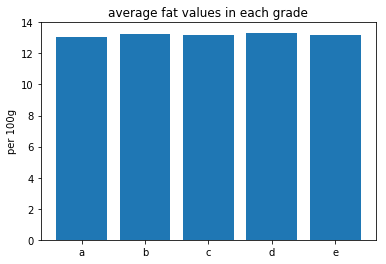

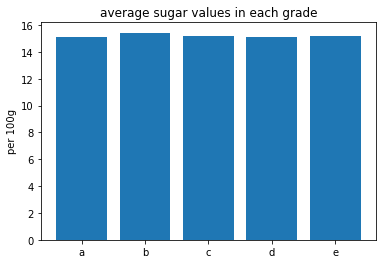

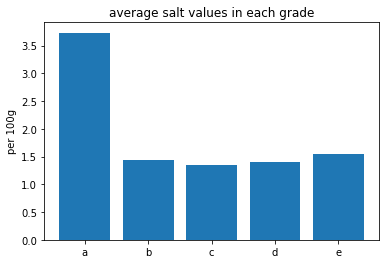

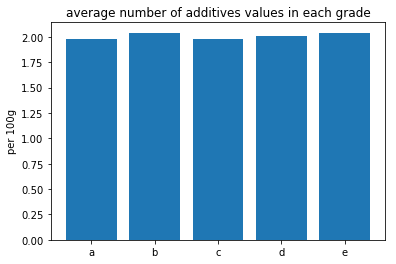

In [10]:
#plot bar plot of mean values of each item in different categories
import matplotlib.pyplot as plt
values=np.arange(len(gradelist))
plt.bar(values,fatmeans)
plt.xticks(values, gradelist)
plt.title('average fat values in each grade')
plt.ylabel('per 100g')
plt.show()
plt.xticks(values, gradelist)
plt.bar(values,sugarmeans)
plt.title('average sugar values in each grade')
plt.ylabel('per 100g')
plt.show()
plt.xticks(values, gradelist)
plt.bar(values,saltmeans)
plt.title('average salt values in each grade')
plt.ylabel('per 100g')
plt.show()
plt.xticks(values, gradelist)
plt.bar(values,additivesmeans)
plt.title('average number of additives values in each grade')
plt.ylabel('per 100g')
plt.show()
#suprisingly, we don't see a clear trend for fat, and sugar in different grades.
#we see that salt level sharply drops when we move from grade a to other grades.
#we also see a slight variation of average number of additives in different grades.
#The conclusion is that fat, sugar does not directly influence food grade. 
#Salt level influences food grade, and number of additives have a higher influence 
#of different grades of food.